<a href="https://colab.research.google.com/github/ThiruvarankanM/Pattern_Assignment2/blob/main/Logistic_Regression_GD_%26_Newton%E2%80%99s_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Generate synthetic data

In [17]:
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

Visualize the data

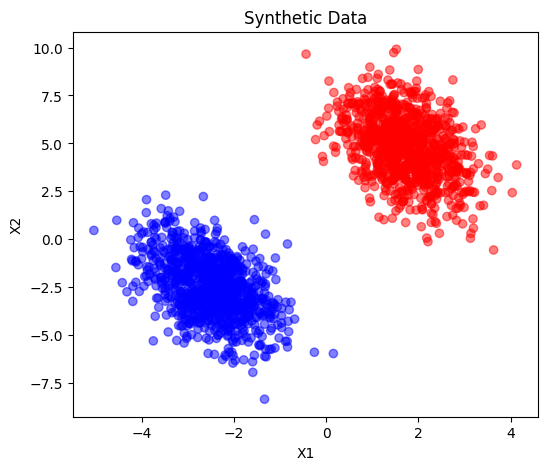

In [18]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Synthetic Data')
plt.show()

Initialize weights and hyperparameters

In [19]:
np.random.seed(0)
weights = np.random.randn(X.shape[1]) * 0.01
bias = 0
learning_rate = 0.01
iterations = 20
loss_history = []

Define sigmoid and loss

In [20]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))
compute_loss = lambda y, y_pred: -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

Batch Gradient Descent loop

In [21]:
m = X.shape[0]
for i in range(iterations):
    y_pred = sigmoid(np.dot(X, weights) + bias)
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    weights -= learning_rate * dw
    bias -= learning_rate * db
    loss_history.append(compute_loss(y, y_pred))
    print(f"Iteration {i+1}: Loss = {loss_history[-1]:.4f}")

Iteration 1: Loss = 0.6675
Iteration 2: Loss = 0.6266
Iteration 3: Loss = 0.5895
Iteration 4: Loss = 0.5561
Iteration 5: Loss = 0.5258
Iteration 6: Loss = 0.4983
Iteration 7: Loss = 0.4733
Iteration 8: Loss = 0.4506
Iteration 9: Loss = 0.4297
Iteration 10: Loss = 0.4107
Iteration 11: Loss = 0.3932
Iteration 12: Loss = 0.3771
Iteration 13: Loss = 0.3622
Iteration 14: Loss = 0.3485
Iteration 15: Loss = 0.3358
Iteration 16: Loss = 0.3239
Iteration 17: Loss = 0.3129
Iteration 18: Loss = 0.3026
Iteration 19: Loss = 0.2930
Iteration 20: Loss = 0.2839


Initialize weights and bias


In [22]:
weights_newton = np.random.randn(X.shape[1]) * 0.01
bias_newton = 0
loss_history_newton = []

In [23]:
# Number of samples
m = X.shape[0]

Newton's Method loop

In [24]:
epsilon = 1e-10  # small value to avoid log(0)

for i in range(20):
    # Compute predictions
    z = np.dot(X, weights_newton) + bias_newton
    y_pred = 1 / (1 + np.exp(-z))

    # Gradient
    grad_w = (1/m) * np.dot(X.T, (y_pred - y))
    grad_b = (1/m) * np.sum(y_pred - y)

    # Hessian
    R = np.diag((y_pred * (1 - y_pred)))
    H = (1/m) * X.T @ R @ X

    # Update weights
    weights_newton -= np.linalg.pinv(H) @ grad_w  # pseudo-inverse for stability
    bias_newton -= grad_b

    # Store loss safely
    loss = -np.mean(y*np.log(y_pred + epsilon) + (1-y)*np.log(1 - y_pred + epsilon))
    loss_history_newton.append(loss)
    print(f"Iteration {i+1}: Loss = {loss:.4f}")

Iteration 1: Loss = 0.6435
Iteration 2: Loss = 0.1445
Iteration 3: Loss = 0.0525
Iteration 4: Loss = 0.0202
Iteration 5: Loss = 0.0080
Iteration 6: Loss = 0.0032
Iteration 7: Loss = 0.0013
Iteration 8: Loss = 0.0005
Iteration 9: Loss = 0.0002
Iteration 10: Loss = 0.0001
Iteration 11: Loss = 0.0000
Iteration 12: Loss = 0.0000
Iteration 13: Loss = 0.0000
Iteration 14: Loss = 0.0000
Iteration 15: Loss = 0.0000
Iteration 16: Loss = 0.0000
Iteration 17: Loss = 0.0000
Iteration 18: Loss = 0.0000
Iteration 19: Loss = 0.0000
Iteration 20: Loss = 0.0000


Loss Curves: Gradient Descent vs Newton’s Method

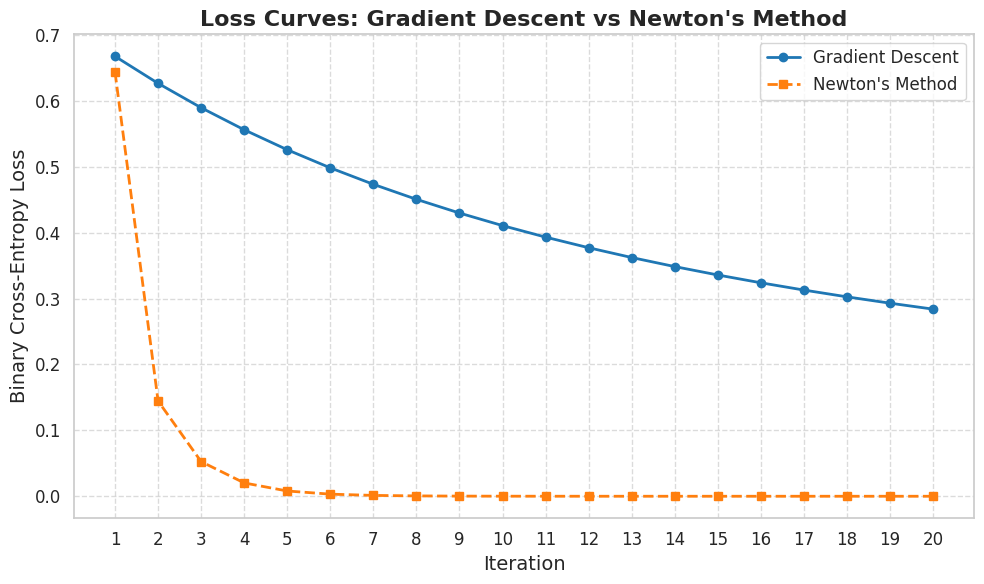

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for professional look
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# Plot Gradient Descent loss
plt.plot(range(1, len(loss_history)+1), loss_history, marker='o', linestyle='-', color='#1f77b4', label='Gradient Descent', linewidth=2, markersize=6)

# Plot Newton's Method loss
plt.plot(range(1, len(loss_history_newton)+1), loss_history_newton, marker='s', linestyle='--', color='#ff7f0e', label="Newton's Method", linewidth=2, markersize=6)

# Titles and labels
plt.title("Loss Curves: Gradient Descent vs Newton's Method", fontsize=16, fontweight='bold')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Binary Cross-Entropy Loss", fontsize=14)

# Tick params for better readability
plt.xticks(range(1, len(loss_history)+1), fontsize=12)
plt.yticks(fontsize=12)

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

plt.show()

Generate New Data

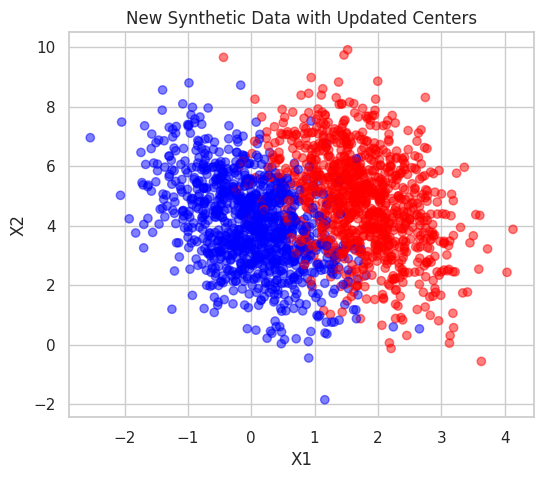

In [27]:
# Updated centers
np.random.seed(0)
centers_new = [[2, 2], [5, 1.5]]
X_new, y_new = make_blobs(n_samples=2000, centers=centers_new, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X_new = np.dot(X_new, transformation)

# Visualize
plt.figure(figsize=(6,5))
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, cmap='bwr', alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('New Synthetic Data with Updated Centers')
plt.show()

In [28]:
m = X.shape[0]
epsilon = 1e-10  # prevent log(0)

for i in range(iterations):
    y_pred = sigmoid(np.dot(X, weights) + bias)

    # Gradients
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)

    # Update weights
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Compute and store loss safely
    loss_history.append(compute_loss(y, y_pred) + epsilon)

    # Print iteration loss
    print(f"Iteration {i+1}: Loss = {loss_history[-1]:.4f}")

Iteration 1: Loss = 0.2755
Iteration 2: Loss = 0.2675
Iteration 3: Loss = 0.2600
Iteration 4: Loss = 0.2529
Iteration 5: Loss = 0.2462
Iteration 6: Loss = 0.2399
Iteration 7: Loss = 0.2339
Iteration 8: Loss = 0.2282
Iteration 9: Loss = 0.2228
Iteration 10: Loss = 0.2177
Iteration 11: Loss = 0.2128
Iteration 12: Loss = 0.2081
Iteration 13: Loss = 0.2036
Iteration 14: Loss = 0.1994
Iteration 15: Loss = 0.1953
Iteration 16: Loss = 0.1914
Iteration 17: Loss = 0.1876
Iteration 18: Loss = 0.1840
Iteration 19: Loss = 0.1806
Iteration 20: Loss = 0.1773


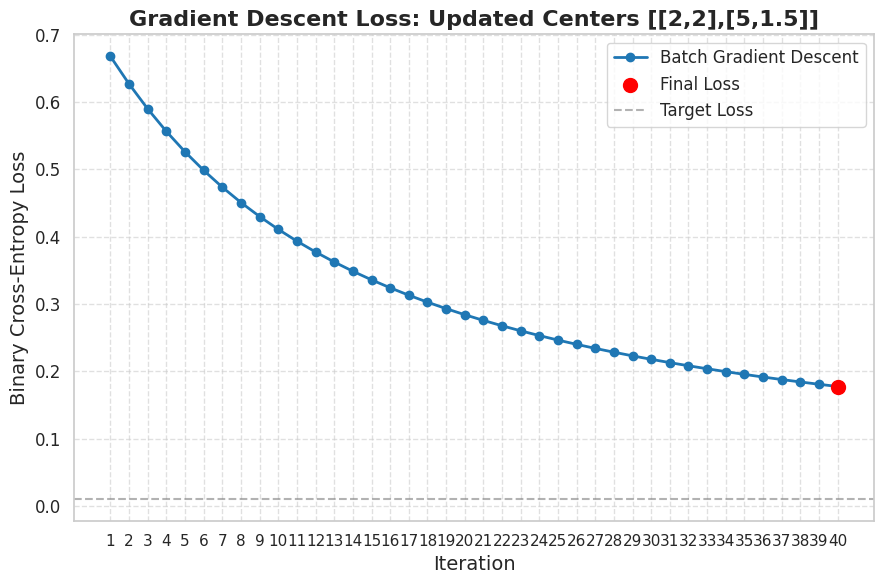

In [30]:
import seaborn as sns

sns.set(style="whitegrid")  # professional background

plt.figure(figsize=(9,6))

# Plot the loss curve
plt.plot(range(1, len(loss_history)+1), loss_history,
         marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=6, label='Batch Gradient Descent')

# Highlight final loss
plt.scatter(len(loss_history), loss_history[-1], color='red', s=100, zorder=5, label='Final Loss')

# Optional: convergence threshold
plt.axhline(y=0.01, color='gray', linestyle='--', alpha=0.6, label='Target Loss')

# Titles and labels
plt.title("Gradient Descent Loss: Updated Centers [[2,2],[5,1.5]]", fontsize=16, fontweight='bold')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Binary Cross-Entropy Loss", fontsize=14)

plt.xticks(range(1, len(loss_history)+1))
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()
